# 📌 BMW Worldwide Sales Analytics (2010–2024) 
A complete data visualization and trend analysis of BMW global sales performance.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)
plt.style.use("default")


In [4]:
df = pd.read_csv("BMW sales data (2010-2024).csv")

# Revenue = Price × Units Sold
df["Revenue_USD"] = df["Price_USD"] * df["Sales_Volume"]

df.head()


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Revenue_USD
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840


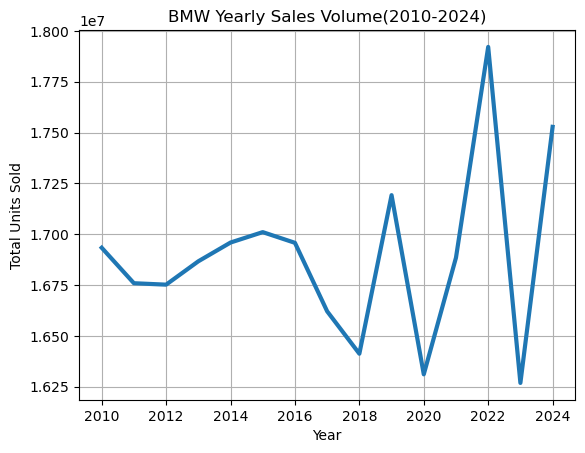

In [7]:
yearly = df.groupby("Year")["Sales_Volume"].sum().reset_index()

plt.plot(yearly["Year"], yearly["Sales_Volume"], linewidth=3)
plt.title("BMW Yearly Sales Volume(2010-2024)")
plt.xlabel("Year")
plt.ylabel("Total Units Sold")
plt.grid(True)
plt.show()


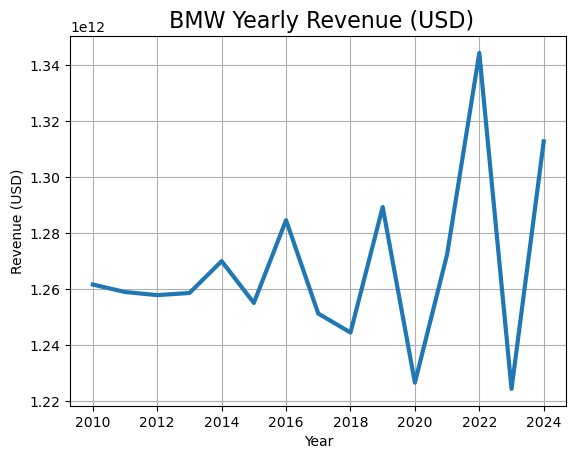

In [9]:
yearly_rev = df.groupby("Year")["Revenue_USD"].sum().reset_index()

plt.plot(yearly_rev["Year"], yearly_rev["Revenue_USD"], linewidth=3)
plt.title(" BMW Yearly Revenue (USD)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Revenue (USD)")
plt.grid(True)
plt.show()


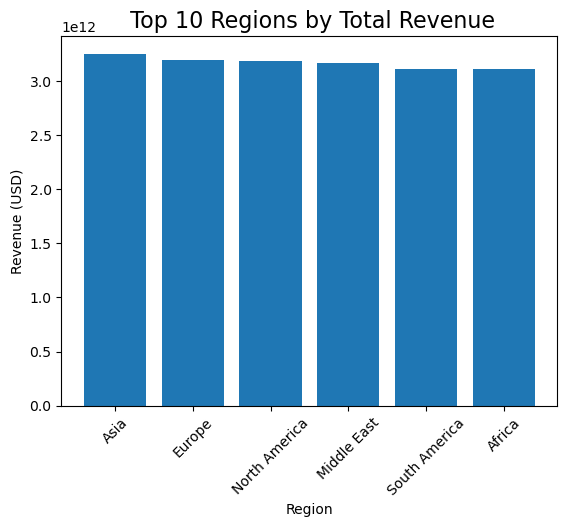

In [11]:
top_regions = (
    df.groupby("Region")["Revenue_USD"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.bar(top_regions.index, top_regions.values)
plt.title(" Top 10 Regions by Total Revenue", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.show()


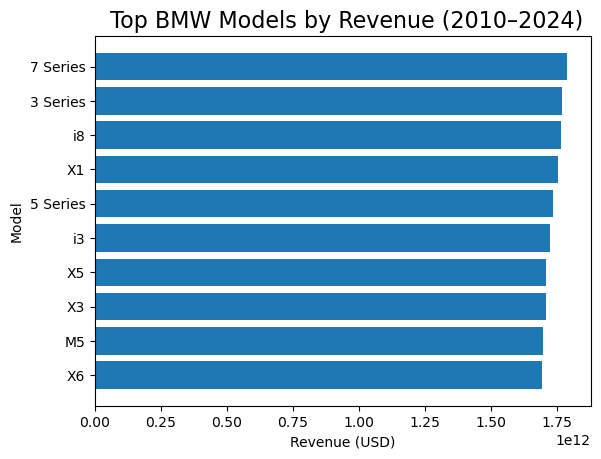

In [13]:
top_models = (
    df.groupby("Model")["Revenue_USD"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.barh(top_models.index, top_models.values)
plt.title(" Top BMW Models by Revenue (2010–2024)", fontsize=16)
plt.xlabel("Revenue (USD)")
plt.ylabel("Model")
plt.gca().invert_yaxis()
plt.show()


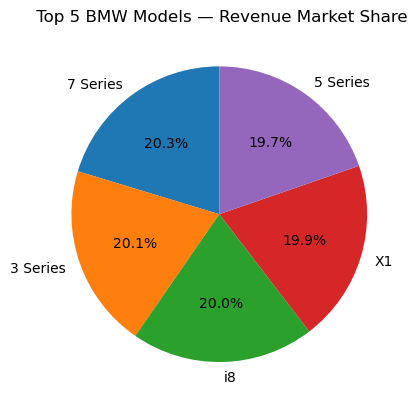

In [14]:
market_share = (
    df.groupby("Model")["Revenue_USD"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

plt.pie(
    market_share.values,
    labels=market_share.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title(" Top 5 BMW Models — Revenue Market Share")
plt.show()


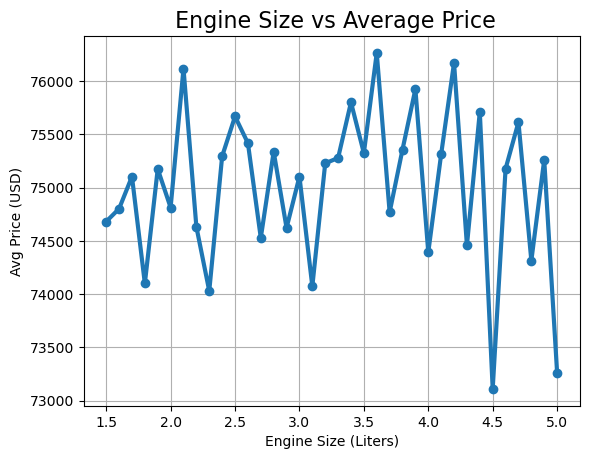

In [16]:
engine_price = df.groupby("Engine_Size_L")["Price_USD"].mean().reset_index()

plt.plot(engine_price["Engine_Size_L"], engine_price["Price_USD"], marker="o", linewidth=3)
plt.title(" Engine Size vs Average Price", fontsize=16)
plt.xlabel("Engine Size (Liters)")
plt.ylabel("Avg Price (USD)")
plt.grid(True)
plt.show()


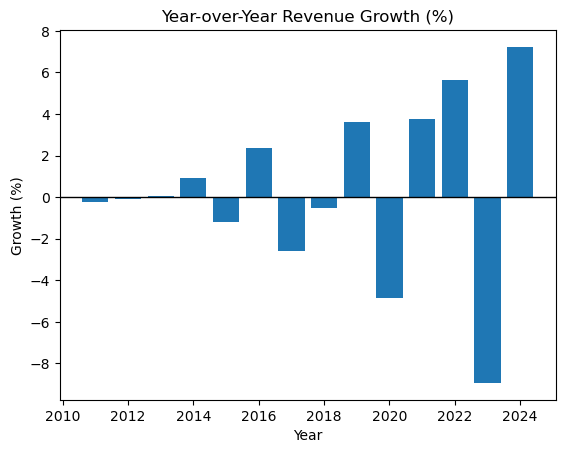

In [19]:
yearly_rev = df.groupby("Year")["Revenue_USD"].sum().reset_index()

yearly_rev["YoY_Growth"] = yearly_rev["Revenue_USD"].pct_change() * 100

plt.bar(yearly_rev["Year"], yearly_rev["YoY_Growth"])
plt.title("Year-over-Year Revenue Growth (%)")
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.axhline(0, color="black", linewidth=1)
plt.show()
